<a href="https://colab.research.google.com/github/LauraParedes873614/My_project_BDA/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import nltk
import sqlite3
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from itertools import groupby

In [18]:
data = pd.read_csv('/content/BASE DE DATOS BANCO DE ALIEMTOS- BIG DATA - Hoja 1 (1) - BASE DE DATOS BANCO DE ALIEMTOS- BIG DATA - Hoja 1 (1) (1).csv')
data.head()

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,LOCALIDAD,DIA DE PEDIDO,FRECUENCIA
0,900647561,1,1.0,11.0,5,15
1,900221394,2,2.0,5.0,5,15
2,830138648,3,3.0,8.0,3,7
3,900325357,3,4.0,13.0,2,15
4,901504186,1,5.0,21.0,4,30


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIT                714 non-null    int64  
 1   GRUPO POBLACIONAL  714 non-null    int64  
 2   RED TERRITORIAL    713 non-null    float64
 3   LOCALIDAD          706 non-null    float64
 4   DIA DE PEDIDO      714 non-null    int64  
 5   FRECUENCIA         714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 33.6 KB


In [20]:
data.describe()

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,LOCALIDAD,DIA DE PEDIDO,FRECUENCIA
count,7.140000e+02,714.000000,713.000000,706.000000,714.000000,714.000000
mean,8.729927e+08,5.001401,5.559607,12.889518,3.155462,15.574230
std,3.342046e+07,3.460658,3.274372,8.968770,1.513726,7.485804
min,8.000008e+08,0.000000,1.000000,1.000000,1.000000,7.000000
25%,8.600068e+08,1.000000,3.000000,5.250000,2.000000,7.000000
50%,9.000753e+08,5.000000,5.000000,11.000000,3.000000,15.000000
75%,9.007618e+08,8.000000,8.000000,19.000000,4.000000,15.000000
max,9.017824e+08,11.000000,14.000000,49.000000,6.000000,30.000000


GRUPO POBLACIONAL

In [21]:
data['GRUPO POBLACIONAL'].mode()


0    1
Name: GRUPO POBLACIONAL, dtype: int64

In [22]:
data.groupby(by='GRUPO POBLACIONAL').count()

,NIT,RED TERRITORIAL,LOCALIDAD,DIA DE PEDIDO,FRECUENCIA
GRUPO POBLACIONAL,,,,,
0,3,3,3,3,3
1,177,177,176,177,177
2,59,59,59,59,59
3,80,80,79,80,80
4,32,32,30,32,32
5,52,52,52,52,52
6,54,53,52,54,54
7,26,26,25,26,26
8,94,94,93,94,94


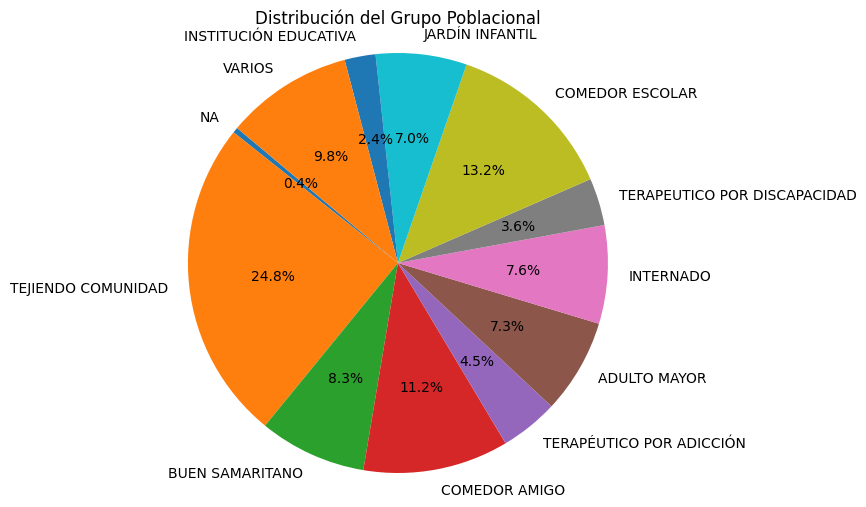

In [23]:

datos_grupo = {
    'NA': 3,
    'TEJIENDO COMUNIDAD': 177,
    'BUEN SAMARITANO': 59,
    'COMEDOR AMIGO': 80,
    'TERAPÉUTICO POR ADICCIÓN': 32,
    'ADULTO MAYOR': 52,
    'INTERNADO': 54,
    'TERAPEUTICO POR DISCAPACIDAD': 26,
    'COMEDOR ESCOLAR': 94,
    'JARDÍN INFANTIL': 50,
    'INSTITUCIÓN EDUCATIVA': 17,
    'VARIOS': 70
}

conn = sqlite3.connect('grupo_poblacional.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS poblacion (grupo TEXT PRIMARY KEY, cantidad INTEGER)''')


conn.commit()
conn.close()

labels = datos_grupo.keys()
sizes = datos_grupo.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución del Grupo Poblacional')
plt.show()


LOCALIDAD

In [24]:
data['LOCALIDAD'].mode()

0    19.0
Name: LOCALIDAD, dtype: float64

In [25]:
data.groupby(by='LOCALIDAD').count()

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,DIA DE PEDIDO,FRECUENCIA
LOCALIDAD,,,,,
1.0,38,38,38,38,38
2.0,24,24,24,24,24
3.0,28,28,28,28,28
4.0,49,49,49,49,49
5.0,38,38,38,38,38
6.0,7,7,7,7,7
7.0,28,28,28,28,28
8.0,52,52,52,52,52
9.0,13,13,13,13,13


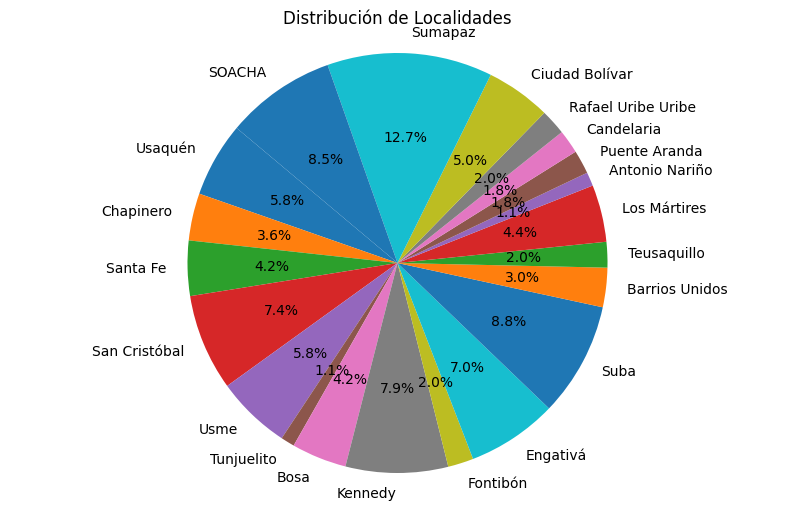

In [28]:


datos_localidades = {
    'Usaquén': 38,
    'Chapinero': 24,
    'Santa Fe': 28,
    'San Cristóbal': 49,
    'Usme': 38,
    'Tunjuelito': 7,
    'Bosa': 28,
    'Kennedy': 52,
    'Fontibón': 13,
    'Engativá': 46,
    'Suba': 58,
    'Barrios Unidos': 20,
    'Teusaquillo': 13,
    'Los Mártires': 29,
    'Antonio Nariño': 7,
    'Puente Aranda': 12,
    'Candelaria': 12,
    'Rafael Uribe Uribe': 13,
    'Ciudad Bolívar': 33,
    'Sumapaz': 84,
    'SOACHA': 56
}

conn = sqlite3.connect('localidad.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS localidad (nombre TEXT PRIMARY KEY, cantidad INTEGER)''')

for localidad, cantidad in datos_localidades.items():
    cursor.execute('''INSERT INTO localidad (nombre, cantidad) VALUES (?, ?)''', (localidad, cantidad))

conn.commit()
conn.close()

labels = datos_localidades.keys()
sizes = datos_localidades.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de Localidades')
plt.show()


red territorial

In [31]:
data['RED TERRITORIAL'].mode()

0    7.0
Name: RED TERRITORIAL, dtype: float64

In [32]:
data.groupby(by='RED TERRITORIAL').count()

,NIT,GRUPO POBLACIONAL,LOCALIDAD,DIA DE PEDIDO,FRECUENCIA
RED TERRITORIAL,,,,,
1.0,88,88,87,88,88
2.0,63,63,63,63,63
3.0,76,76,76,76,76
4.0,84,84,83,84,84
5.0,63,63,61,63,63
6.0,52,52,52,52,52
7.0,94,94,93,94,94
8.0,39,39,39,39,39
9.0,78,78,77,78,78


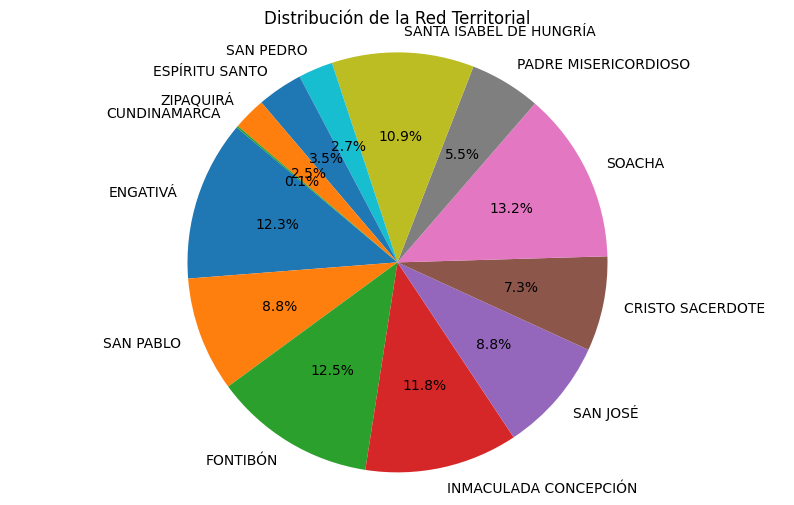

In [37]:

datos_red_territorial = {
    'ENGATIVÁ': 88,
    'SAN PABLO': 63,
    'FONTIBÓN': 89,
    'INMACULADA CONCEPCIÓN': 84,
    'SAN JOSÉ': 63,
    'CRISTO SACERDOTE': 52,
    'SOACHA': 94,
    'PADRE MISERICORDIOSO': 39,
    'SANTA ISABEL DE HUNGRÍA': 78,
    'SAN PEDRO': 19,
    'ESPÍRITU SANTO': 25,
    'ZIPAQUIRÁ': 18,
    'CUNDINAMARCA': 1
}

conn = sqlite3.connect('red_territorial.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS red_territorial (nombre TEXT PRIMARY KEY, cantidad INTEGER)''')


conn.commit()
conn.close()

labels = datos_red_territorial.keys()
sizes = datos_red_territorial.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de la Red Territorial')
plt.show()


dia de pedido

In [39]:
data['DIA DE PEDIDO'].mode()

0    3
Name: DIA DE PEDIDO, dtype: int64

In [40]:
data.groupby(by='DIA DE PEDIDO').count()

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,LOCALIDAD,FRECUENCIA
DIA DE PEDIDO,,,,,
1,137,137,137,137,137
2,124,124,124,121,124
3,145,145,145,144,145
4,141,141,141,139,141
5,133,133,132,131,133
6,34,34,34,34,34


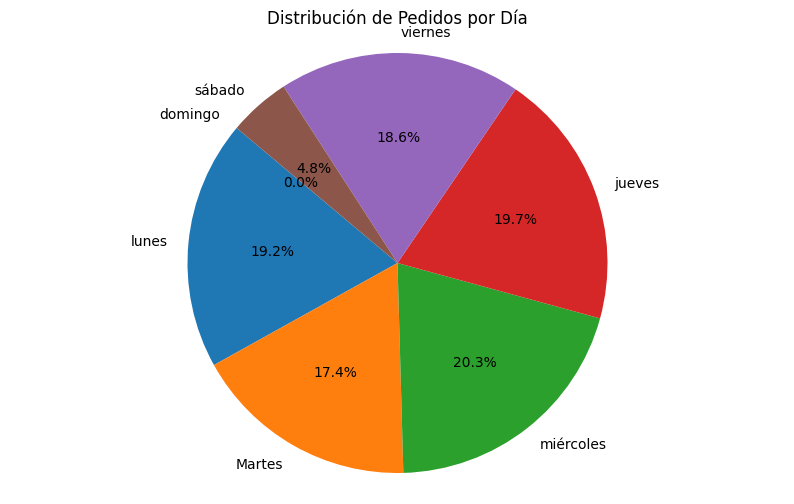

In [41]:

datos_dia_pedido = {
    'lunes': 137,
    'Martes': 124,
    'miércoles': 145,
    'jueves': 141,
    'viernes': 133,
    'sábado': 34,
    'domingo': 0
}

conn = sqlite3.connect('dia_de_pedido.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS dia_de_pedido (dia TEXT PRIMARY KEY, cantidad INTEGER)''')


conn.commit()
conn.close()

labels = datos_dia_pedido.keys()
sizes = datos_dia_pedido.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de Pedidos por Día')
plt.show()


frecuencia

In [42]:
data['FRECUENCIA'].mode()

0    15
Name: FRECUENCIA, dtype: int64

In [43]:
np.mean(data['FRECUENCIA'])

15.57422969187675

In [44]:
data['FRECUENCIA'].std()

7.485803846178778

In [45]:
data.groupby(by='FRECUENCIA').count()

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,LOCALIDAD,DIA DE PEDIDO
FRECUENCIA,,,,,
7,185,185,185,183,185
15,403,403,402,397,403
30,126,126,126,126,126


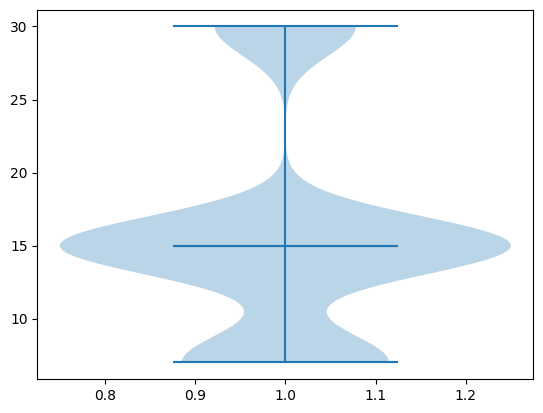

In [48]:
# Caracterizando con gráfico de Violin
_ = pl.violinplot(data.FRECUENCIA, quantiles=[0.25,0.5,0.75])

correlacio

In [47]:
# Calculo Matriz de Correlación
data.corr(numeric_only=True)

,NIT,GRUPO POBLACIONAL,RED TERRITORIAL,LOCALIDAD,DIA DE PEDIDO,FRECUENCIA
NIT,1.000000,0.000331,-0.018331,0.018533,-0.033836,-0.047101
GRUPO POBLACIONAL,0.000331,1.000000,0.080637,0.010439,-0.057872,-0.247665
RED TERRITORIAL,-0.018331,0.080637,1.000000,0.351664,-0.041101,0.029693
LOCALIDAD,0.018533,0.010439,0.351664,1.000000,0.019807,0.030184
DIA DE PEDIDO,-0.033836,-0.057872,-0.041101,0.019807,1.000000,0.066003
FRECUENCIA,-0.047101,-0.247665,0.029693,0.030184,0.066003,1.000000


<Axes: >

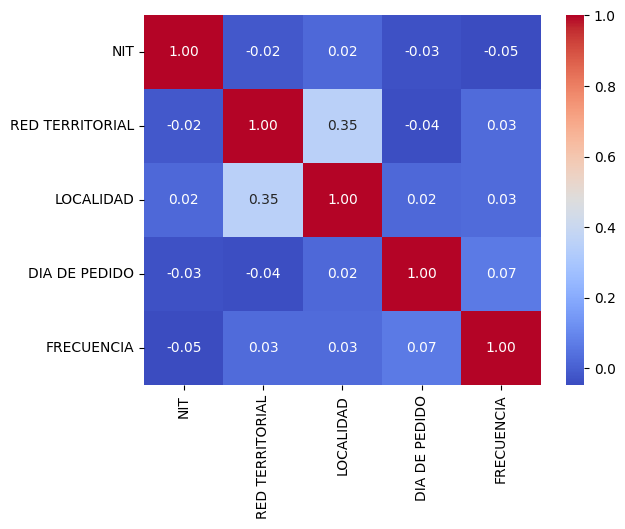

In [46]:
# Grafico Matriz de Correlación
sns.heatmap(data.drop('GRUPO POBLACIONAL', axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")